### 模型正则化

解决模型中含有巨大的方差误差问题，其中有一种非常标准的方法——模型正则化
模型正则化的本质：限制参数的大小
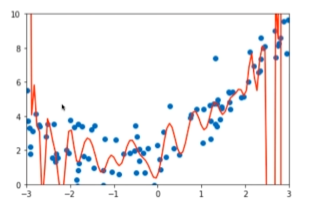
由上图可以想象**每个多项式项前面的参数，即θ，可能会非常大。模型正则化要做的事就是限制θ的大小。**

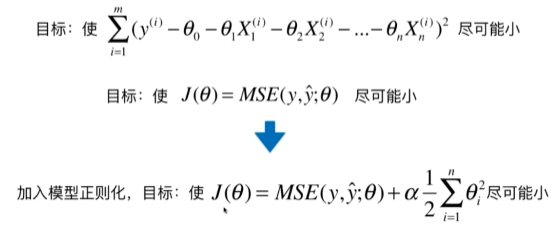
如果发生了过拟合，那么θ可能会特别的大，为了限制θ的大小，加入正则化项。  
正则化项：
- 为了时正则化项尽可能的小，那么必须让每个θ都尽可能的小。 这里的i为1~n，说明θ0不需要考虑，这是因为θ0本身不是任何x的系数，本身只是一个截距。它决定了曲线的高低，但不决定曲线每一部分的陡峭程度，故模型正则化时不需要考虑θ0。
- α，用于调节我们的正则化项让θ尽可能小的程度，占我们优化整个损失函数程度的多少。

### 岭回归

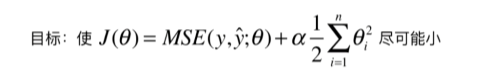

### 数据准备

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

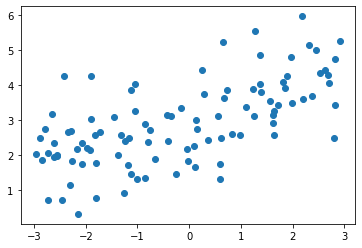

In [3]:
plt.scatter(x, y)
plt.show()

### 未正则化

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 多项式回归
lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", lin_reg)
    ])

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)  # 20阶
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)  # 未正则化可以发现模型过拟合了

167.9401085999025

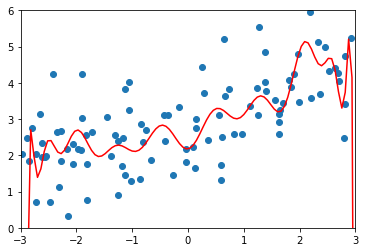

In [7]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

In [9]:
# 查看下系数
lin_reg.coef_   # 可以发现，为了使模型更加陡峭，有些系数特别的大

array([ 0.00000000e+00,  4.51420572e-01,  2.33356109e+01,  1.42846232e+01,
       -6.53846205e+02, -2.53385003e+02,  7.60081201e+03,  2.36383160e+03,
       -4.66569540e+04, -1.22026494e+04,  1.67921957e+05,  3.63834773e+04,
       -3.72244181e+05, -6.41186496e+04,  5.14730775e+05,  6.58881348e+04,
       -4.32752964e+05, -3.64946916e+04,  2.02479125e+05,  8.42103402e+03,
       -4.04490051e+04])

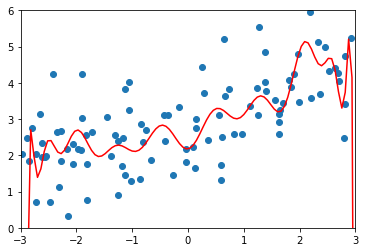

In [10]:
# 模型绘制函数
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(poly_reg)

### 使用岭回归

In [11]:
from sklearn.linear_model import Ridge

# 使用岭回归
def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])


In [15]:
ridge1_reg = RidgeRegression(20, 0.0001) # 因为岭回归时theta的平方，可能比较大。故alpha取小点
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)  # 可以发现均方差减小了

1.3233492754136291

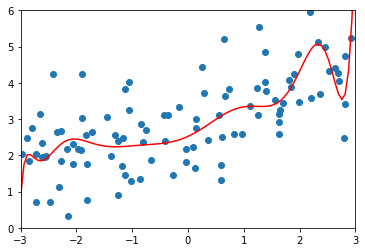

In [16]:
plot_model(ridge1_reg)

In [17]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict) 

1.1888759304218461

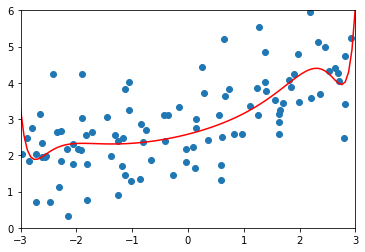

In [18]:
plot_model(ridge2_reg)

In [19]:
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict) # 正则化有些过头了

1.3196456113086197

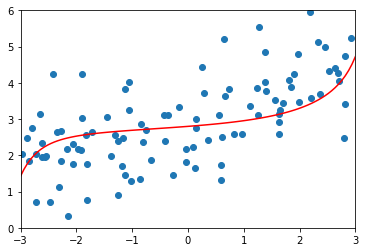

In [20]:
plot_model(ridge3_reg)

In [21]:
ridge4_reg = RidgeRegression(20, 10000000)
# 当alpha非常大时，优化的J(θ)的本质其实就是在优化正则化项。让正则化项最小，即各个theta最小。
# 即完全都没有梯度了
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

1.8408455590998372

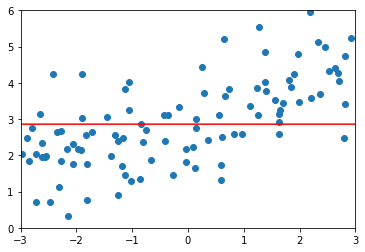

In [22]:
plot_model(ridge4_reg)